CICIOT2023 ML PIPELINE WITH GOA FEATURE SELECTION
Loading CICIOT2023 dataset from C:\ProgramData\anaconda3\Lib\site-packages\pandas\io\parsers\capstone\part-00112-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
Cleaning and preprocessing data...
Missing values before cleaning: 0
Removed 0 duplicate rows
Dataset shape after preprocessing: (253575, 46)
Number of classes: 34
Creating data visualizations...


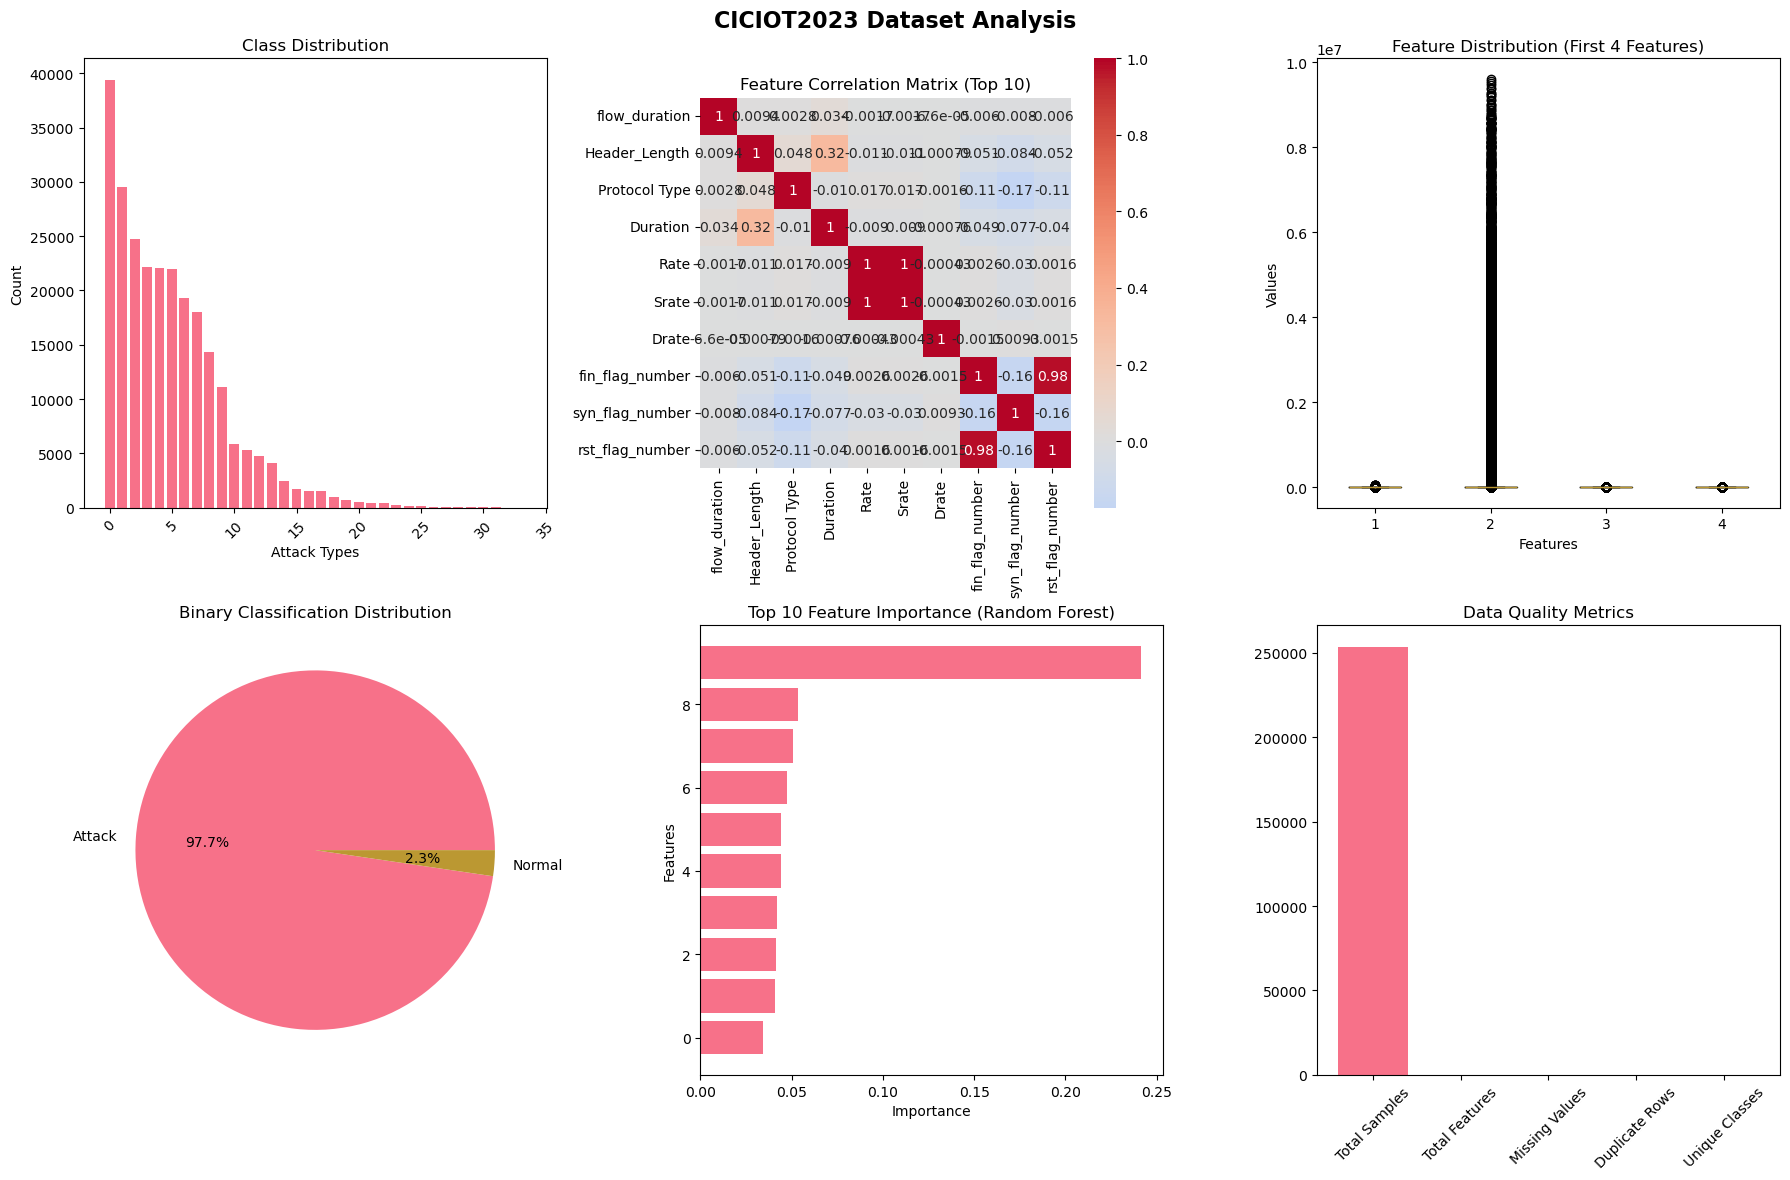

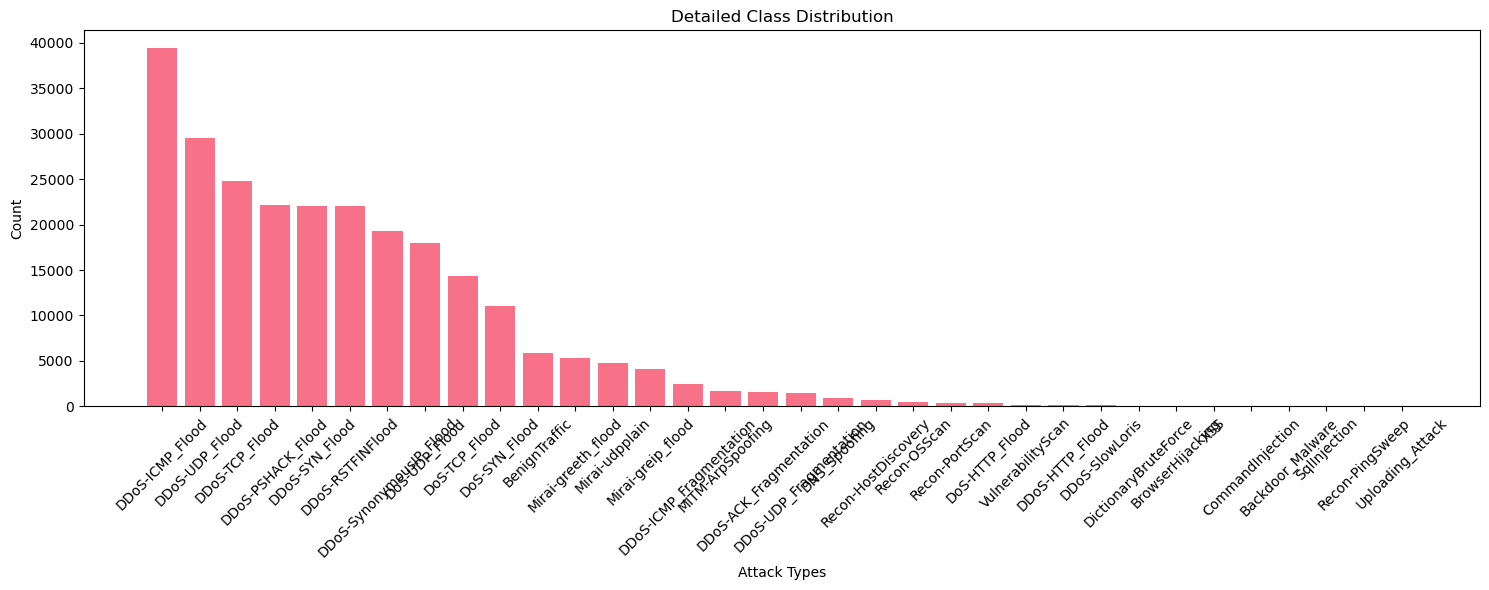


FEATURE SELECTION USING GAZELLE OPTIMIZATION
Starting GOA with 10 gazelles for 20 iterations...
Iteration 0: Best fitness = 0.9763, Selected features = 17
Iteration 10: Best fitness = 0.9821, Selected features = 21

Optimization completed!
Best fitness: 0.9821
Selected features: 21/46


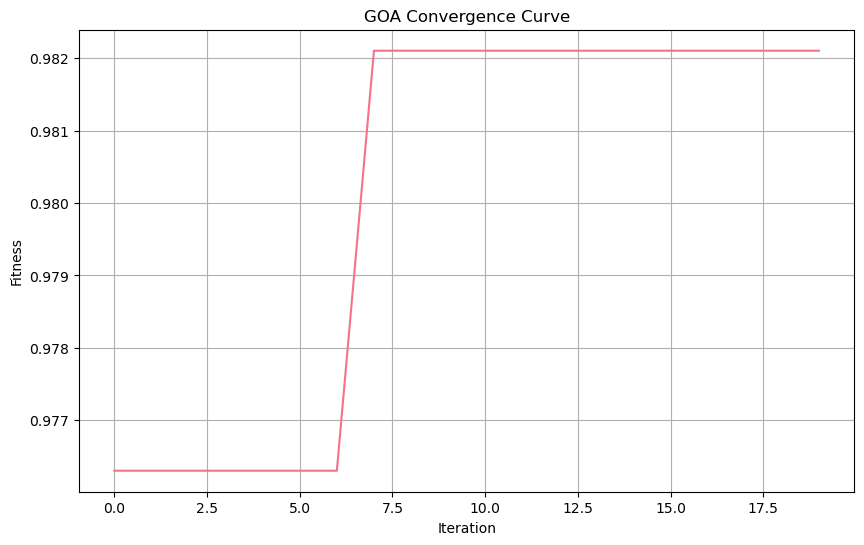


Selected 21 features out of 46

BINARY CLASSIFICATION: HYBRID CNN + LIGHTGBM
Class distribution before resampling: [  4117 173385]
Using SMOTE with n_neighbors=5 (min_count=4117)
Class distribution after resampling: [173385 173385]
Epoch 1/10
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9818 - loss: 0.0662 - val_accuracy: 0.9999 - val_loss: 0.0121
Epoch 2/10
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9907 - loss: 0.0390 - val_accuracy: 0.9998 - val_loss: 0.0122
Epoch 3/10
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9914 - loss: 0.0363 - val_accuracy: 0.9999 - val_loss: 0.0135
Epoch 4/10
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0347 - val_accuracy: 0.9997 - val_loss: 0.0128
10837/10837 ━━━━━━━━━━━━━━━━━━━━ 10s 950us/step
2378/2378 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Memory usage: 1090.93 MB
[LightGBM] [Info] Number of positive: 173385, number of negative: 173385
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

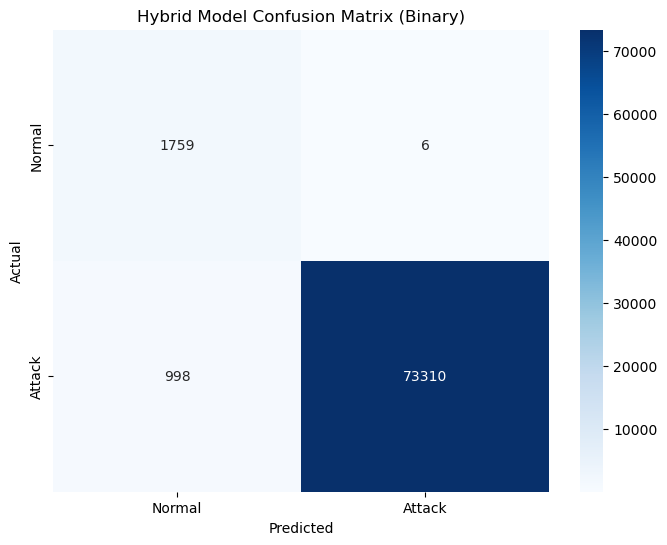


MULTICLASS CLASSIFICATION: HYBRID CNN + RANDOM FOREST
Class distribution before resampling: [   16  4117    25    18  1074    93 27586  1708 15506 15403 15441    89
 13485 17335 20666  1045   680    50   281  7752 10023 12616  1199  3711
  2886  3358   502   355    10   297    12     2   140    21]
Using RandomOverSampler (min_count=2)
Class distribution after resampling: [27586 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586
 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586
 27586 27586 27586 27586 27586 27586 27586 27586 27586 27586]
Epoch 1/10
5863/5863 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.6528 - loss: 0.8620 - val_accuracy: 0.0267 - val_loss: 9.7339
Epoch 2/10
5863/5863 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.8769 - loss: 0.3274 - val_accuracy: 0.0667 - val_loss: 8.6646
Epoch 3/10
5863/5863 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9067 - loss: 0.2471 - val_accuracy: 0.0894 - val_loss: 7.3190
Epoch 4/10
5863/5863 ━━

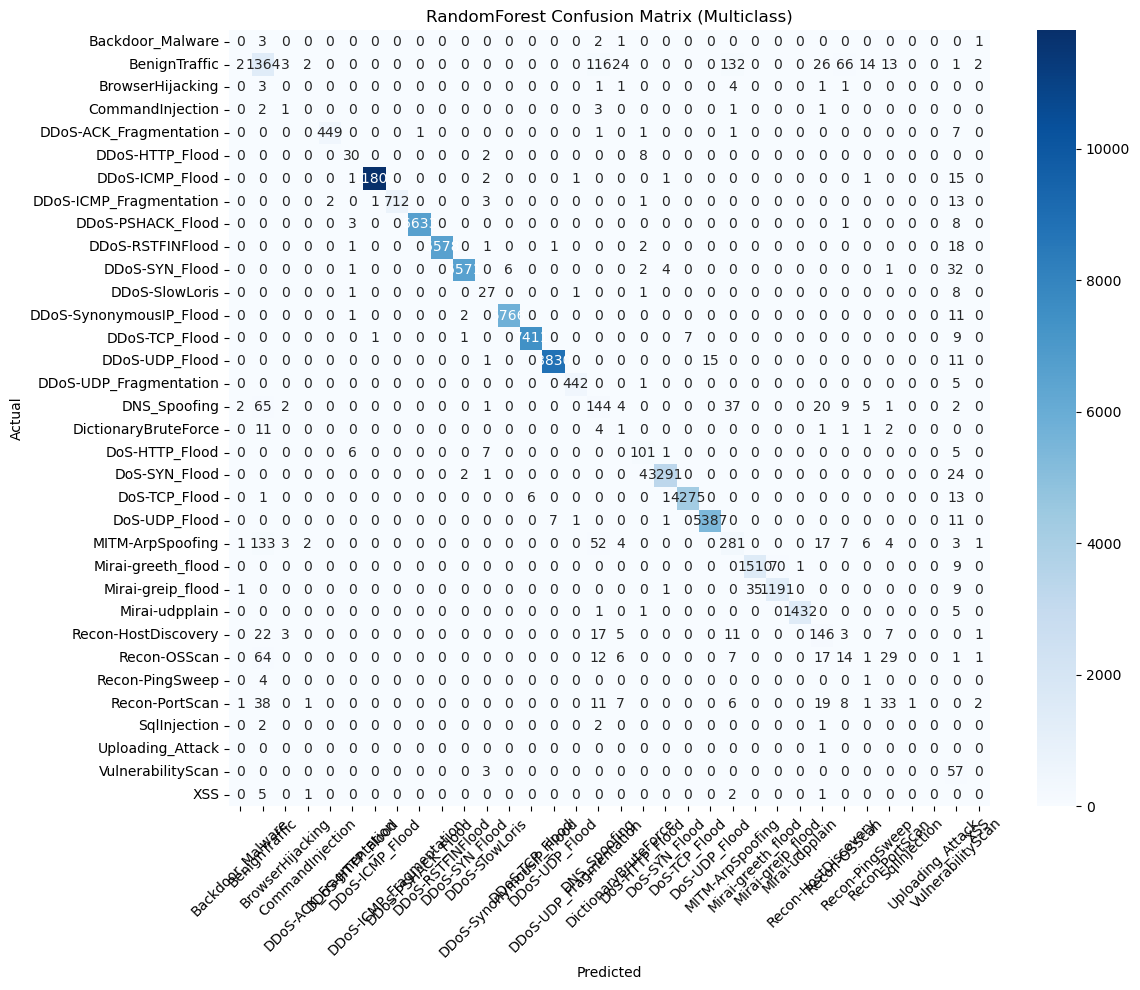


PIPELINE SUMMARY
Original features: 46
Selected features (GOA): 21
Feature reduction: 54.3%
Binary classification accuracy: 0.9868
Multiclass classification accuracy: 0.9790
GOA best fitness: 0.9821


In [2]:
# Complete ML Pipeline with GOA Feature Selection for CICIOT2023 Dataset
# Includes: Data Preprocessing, Visualization, Feature Selection, and Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# Deep Learning imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Imbalanced learning
from imblearn.over_sampling import RandomOverSampler, SMOTE
# LightGBM
import lightgbm as lgb
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --------------------------
# 1. GAZELLE OPTIMIZATION ALGORITHM (GOA) FOR FEATURE SELECTION
# --------------------------
# ... (previous imports and code remain the same)

class GazelleOptimization:
    """
    Gazelle Optimization Algorithm for Feature Selection
    Based on the hunting behavior of gazelles
    """
    def __init__(self, n_gazelles=20, max_iterations=50, alpha=2.0, beta=1.5):
        self.n_gazelles = n_gazelles
        self.max_iterations = max_iterations
        self.alpha = alpha  # Exploration parameter
        self.beta = beta    # Exploitation parameter
        self.best_position = None
        self.best_fitness = float('-inf')
        self.fitness_history = []
    
    def initialize_population(self, n_features):
        """Initialize gazelle population randomly"""
        return np.random.randint(0, 2, size=(self.n_gazelles, n_features))
    
    def fitness_function(self, X, y, selected_features):  # FIXED INDENTATION
        if np.sum(selected_features) == 0:
            return 0.0
        
        X_selected = X[:, selected_features == 1]
        
        n_samples = min(1000, X_selected.shape[0])
        indices = np.random.choice(X_selected.shape[0], n_samples, replace=False)
        X_subset = X_selected[indices]
        y_subset = y[indices]
        
        class_counts = np.bincount(y_subset)
        if len(class_counts) > 0 and np.all(class_counts >= 2):
            stratify = y_subset
        else:
            stratify = None
        X_train, X_test, y_train, y_test = train_test_split(
            X_subset, y_subset, test_size=0.3, random_state=42, stratify=stratify
        )
        clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        feature_penalty = 0.01 * np.sum(selected_features) / len(selected_features)
        return accuracy - feature_penalty  # CORRECTED INDENTATION

    # ... (rest of the class remains the same)

# ... (rest of the code remains the same)

    def update_position(self, gazelle_pos, iteration):
        """Update gazelle position based on GOA equations"""
        # Gazelle movement parameters
        r1, r2 = np.random.random(), np.random.random()
        # Exploration phase (early iterations)
        if iteration < self.max_iterations * 0.6:
            # Random exploration
            new_pos = np.random.randint(0, 2, size=len(gazelle_pos))
        else:
            # Exploitation phase (later iterations)
            # Move towards best position with some randomness
            prob = 1 / (1 + np.exp(-self.alpha * (self.best_fitness - 0.5)))
            new_pos = np.where(np.random.random(len(gazelle_pos)) < prob, 
                             self.best_position, 
                             gazelle_pos)
            # Add some mutation
            mutation_mask = np.random.random(len(new_pos)) < 0.1
            new_pos[mutation_mask] = 1 - new_pos[mutation_mask]
        return new_pos.astype(int)
    
    def optimize(self, X, y):
        """
        Main optimization loop
        """
        n_features = X.shape[1]
        # Initialize population
        population = self.initialize_population(n_features)
        print(f"Starting GOA with {self.n_gazelles} gazelles for {self.max_iterations} iterations...")
        for iteration in range(self.max_iterations):
            # Evaluate fitness for each gazelle
            fitness_scores = []
            for i, gazelle in enumerate(population):
                fitness = self.fitness_function(X, y, gazelle)
                fitness_scores.append(fitness)
                # Update best solution
                if fitness > self.best_fitness:
                    self.best_fitness = fitness
                    self.best_position = gazelle.copy()
            # Store fitness history
            self.fitness_history.append(self.best_fitness)
            # Update positions
            new_population = []
            for i, gazelle in enumerate(population):
                new_pos = self.update_position(gazelle, iteration)
                new_population.append(new_pos)
            population = np.array(new_population)
            # Print progress
            if iteration % 10 == 0:
                selected_features = np.sum(self.best_position)
                print(f"Iteration {iteration}: Best fitness = {self.best_fitness:.4f}, "
                      f"Selected features = {selected_features}")
        print("\nOptimization completed!")
        print(f"Best fitness: {self.best_fitness:.4f}")
        print(f"Selected features: {np.sum(self.best_position)}/{n_features}")
        return self.best_position, self.best_fitness

# --------------------------
# 2. DATA PREPROCESSING FUNCTIONS
# --------------------------
def load_and_preprocess_data(file_path, sample_size=10000):
    """
    Load and preprocess CICIOT2023 dataset
    """
    # Load actual CICIOT2023 dataset
    print(f"Loading CICIOT2023 dataset from {'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00112-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'}...")
    df = pd.read_csv('C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00112-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
    
    # Assuming 'label' is the target column
    if 'label' not in df.columns:
        # Try common label column names
        possible_labels = ['Label', 'class', 'Class', 'target', 'Target']
        for col in possible_labels:
            if col in df.columns:
                df = df.rename(columns={col: 'label'})
                break
    return df

def clean_and_preprocess(df):
    """
    Clean and preprocess the dataset
    """
    print("Cleaning and preprocessing data...")
    # Handle missing values
    print(f"Missing values before cleaning: {df.isnull().sum().sum()}")
    df = df.dropna()
    # Handle infinite values
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    # Remove duplicate rows
    initial_shape = df.shape
    df = df.drop_duplicates()
    print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows")
    # Separate features and target
    X = df.drop('label', axis=1)
    y = df['label']
    # Handle categorical features if any
    categorical_cols = X.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"Found categorical columns: {list(categorical_cols)}")
        # For simplicity, drop categorical columns or encode them
        X = X.drop(categorical_cols, axis=1)
    # Convert to numpy arrays
    X = X.values
    y = y.values
    print(f"Dataset shape after preprocessing: {X.shape}")
    print(f"Number of classes: {len(np.unique(y))}")
    return X, y, df

# --------------------------
# 3. DATA VISUALIZATION FUNCTIONS
# --------------------------
def visualize_data(df, X, y):
    """
    Create comprehensive data visualizations
    """
    print("Creating data visualizations...")
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('CICIOT2023 Dataset Analysis', fontsize=16, fontweight='bold')
    
    # 1. Class distribution
    class_counts = pd.Series(y).value_counts()
    axes[0, 0].bar(range(len(class_counts)), class_counts.values)
    axes[0, 0].set_title('Class Distribution')
    axes[0, 0].set_xlabel('Attack Types')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Feature correlation heatmap (top 10 features)
    feature_cols = [col for col in df.columns if col != 'label']
    corr_matrix = df[feature_cols[:10]].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[0, 1])
    axes[0, 1].set_title('Feature Correlation Matrix (Top 10)')
    
    # 3. Feature distribution (first few features)
    feature_data = X[:, :4]  # First 4 features
    axes[0, 2].boxplot(feature_data)
    axes[0, 2].set_title('Feature Distribution (First 4 Features)')
    axes[0, 2].set_xlabel('Features')
    axes[0, 2].set_ylabel('Values')
    
    # 4. Binary vs Multiclass distribution
    # Create binary labels
    benign_keywords = ['benign', 'normal', 'legitimate']
    le_temp = LabelEncoder()
    y_encoded = le_temp.fit_transform(y)
    benign_indices = [i for i, cls in enumerate(le_temp.classes_) 
                     if any(kw in cls.lower() for kw in benign_keywords)]
    y_binary = np.where(np.isin(y_encoded, benign_indices), 'Normal', 'Attack')
    binary_counts = pd.Series(y_binary).value_counts()
    axes[1, 0].pie(binary_counts.values, labels=binary_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Binary Classification Distribution')
    
    # 5. Feature importance (using Random Forest)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    feature_importance = rf.feature_importances_
    # Plot top 10 most important features
    top_indices = np.argsort(feature_importance)[-10:]
    axes[1, 1].barh(range(len(top_indices)), feature_importance[top_indices])
    axes[1, 1].set_title('Top 10 Feature Importance (Random Forest)')
    axes[1, 1].set_xlabel('Importance')
    axes[1, 1].set_ylabel('Features')
    
    # 6. Data quality metrics
    quality_metrics = {
        'Total Samples': len(df),
        'Total Features': X.shape[1],
        'Missing Values': df.isnull().sum().sum(),
        'Duplicate Rows': len(df) - len(df.drop_duplicates()),
        'Unique Classes': len(np.unique(y))
    }
    axes[1, 2].bar(quality_metrics.keys(), quality_metrics.values())
    axes[1, 2].set_title('Data Quality Metrics')
    axes[1, 2].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Additional visualization: Class distribution details
    plt.figure(figsize=(15, 6))
    class_counts_detailed = pd.Series(y).value_counts()
    plt.bar(range(len(class_counts_detailed)), class_counts_detailed.values)
    plt.title('Detailed Class Distribution')
    plt.xlabel('Attack Types')
    plt.ylabel('Count')
    plt.xticks(range(len(class_counts_detailed)), class_counts_detailed.index, rotation=45)
    plt.tight_layout()
    plt.show()
    return feature_importance

# --------------------------
# 4. SAFE RESAMPLING FUNCTION
# --------------------------
def safe_resample(X, y):
    """
    Safely resample data handling small classes
    """
    class_counts = np.bincount(y)
    min_count = min(class_counts)
    if min_count <= 5:  # Use RandomOverSampler for small classes
        print(f"Using RandomOverSampler (min_count={min_count})")
        ros = RandomOverSampler(random_state=42)
        return ros.fit_resample(X, y)
    else:  # Use SMOTE with adjusted neighbors
        n_neighbors = min(5, min_count - 1)
        print(f"Using SMOTE with n_neighbors={n_neighbors} (min_count={min_count})")
        smote = SMOTE(k_neighbors=n_neighbors, random_state=42)
        return smote.fit_resample(X, y)

# --------------------------
# 5. CNN FEATURE EXTRACTOR MODEL
# --------------------------
def create_cnn_feature_extractor(input_shape, num_classes, task_type='binary'):
    """
    Create CNN model for feature extraction
    """
    inputs = Input(shape=input_shape)
    # CNN layers
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    # Dense layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    features = Dense(128, activation='relu')(x)
    # Output layer
    if task_type == 'binary':
        outputs = Dense(1, activation='sigmoid')(features)
    else:
        outputs = Dense(num_classes, activation='softmax')(features)
    model = Model(inputs=inputs, outputs=outputs)
    feature_extractor = Model(inputs=inputs, outputs=features)
    return model, feature_extractor
# ... (previous imports remain the same) ...
import psutil  # For memory monitoring

# Add this function to monitor memory usage
def check_memory_usage():
    process = psutil.Process()
    mem_info = process.memory_info()
    print(f"Memory usage: {mem_info.rss / (1024 ** 2):.2f} MB")

# --------------------------
# MODIFIED MAIN PIPELINE
# --------------------------
def main_pipeline(file_path):
    print("="*60)
    print("CICIOT2023 ML PIPELINE WITH GOA FEATURE SELECTION")
    print("="*60)
    
    # Step 1: Load and preprocess data
    df = load_and_preprocess_data(file_path)
    X, y, df_clean = clean_and_preprocess(df)
    
    # Step 2: Data visualization
    feature_importance = visualize_data(df_clean, X, y)
    
    # Step 3: Feature selection using GOA
    print("\n" + "="*50)
    print("FEATURE SELECTION USING GAZELLE OPTIMIZATION")
    print("="*50)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    le_goa = LabelEncoder()
    y_encoded = le_goa.fit_transform(y)
    
    # Use simpler GOA parameters to reduce memory footprint
    goa = GazelleOptimization(n_gazelles=10, max_iterations=20)
    selected_features, best_fitness = goa.optimize(X_scaled, y_encoded)
    
    # Plot GOA convergence
    plt.figure(figsize=(10, 6))
    plt.plot(goa.fitness_history)
    plt.title('GOA Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.grid(True)
    plt.show()
    
    # Apply feature selection
    X_selected = X_scaled[:, selected_features == 1]
    print(f"\nSelected {X_selected.shape[1]} features out of {X.shape[1]}")

    # --------------------------
    # BINARY CLASSIFICATION
    # --------------------------
    print("\n" + "="*50)
    print("BINARY CLASSIFICATION: HYBRID CNN + LIGHTGBM")
    print("="*50)
    
    # Create binary labels
    benign_keywords = ['benign', 'normal', 'legitimate']
    le_binary = LabelEncoder()
    y_temp = le_binary.fit_transform(y)
    benign_indices = [i for i, cls in enumerate(le_binary.classes_) 
                     if any(kw in cls.lower() for kw in benign_keywords)]
    y_binary = np.where(np.isin(y_temp, benign_indices), 0, 1)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_binary, test_size=0.3, stratify=y_binary, random_state=42
    )
    
    # Handle class imbalance
    print("Class distribution before resampling:", np.bincount(y_train))
    X_balanced, y_balanced = safe_resample(X_train, y_train)
    print("Class distribution after resampling:", np.bincount(y_balanced))
    
    # Reshape for CNN
    X_train_reshaped = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], 1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Create and train CNN
    input_shape = (X_train_reshaped.shape[1], 1)
    cnn_model, feature_extractor = create_cnn_feature_extractor(input_shape, 1, 'binary')
    cnn_model.compile(optimizer=Adam(0.001), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = cnn_model.fit(
        X_train_reshaped, y_balanced,
        epochs=10,  # Reduced epochs
        batch_size=128,  # Increased batch size
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Extract features
    train_features = feature_extractor.predict(X_train_reshaped)
    test_features = feature_extractor.predict(X_test_reshaped)
    
    # Add memory check
    check_memory_usage()
    
    # Train LightGBM with safer parameters
    try:
        lgb_binary = lgb.LGBMClassifier(
            num_leaves=31,
            max_depth=5,  # Reduced depth
            learning_rate=0.05,
            n_estimators=100,  # Reduced estimators
            class_weight='balanced',
            n_jobs=1  # Use single thread
        )
        lgb_binary.fit(train_features, y_balanced)
        y_pred_binary = lgb_binary.predict(test_features)
        accuracy_binary = accuracy_score(y_test, y_pred_binary)
        print(f"\nHybrid Model Accuracy (Binary): {accuracy_binary:.4f}")
        
        # Classification report
        print("\nClassification Report (Binary):")
        print(classification_report(y_test, y_pred_binary, target_names=['Normal', 'Attack']))
        
        # Confusion matrix
        cm_binary = confusion_matrix(y_test, y_pred_binary)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Normal', 'Attack'], 
                    yticklabels=['Normal', 'Attack'])
        plt.title('Hybrid Model Confusion Matrix (Binary)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    except Exception as e:
        print(f"LightGBM failed: {str(e)}")
        print("Using RandomForest as fallback...")
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(train_features, y_balanced)
        y_pred_binary = rf.predict(test_features)
        accuracy_binary = accuracy_score(y_test, y_pred_binary)
        print(f"RandomForest Accuracy (Binary): {accuracy_binary:.4f}")

    # --------------------------
    # MULTICLASS CLASSIFICATION
    # --------------------------
    print("\n" + "="*50)
    print("MULTICLASS CLASSIFICATION: HYBRID CNN + RANDOM FOREST")
    print("="*50)
    
    # Prepare multiclass data
    le_multiclass = LabelEncoder()
    y_multiclass = le_multiclass.fit_transform(y)
    
    # Split data
    X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
        X_selected, y_multiclass, test_size=0.3, stratify=y_multiclass, random_state=42
    )
    
    # Handle class imbalance
    print("Class distribution before resampling:", np.bincount(y_train_mc))
    X_balanced_mc, y_balanced_mc = safe_resample(X_train_mc, y_train_mc)
    print("Class distribution after resampling:", np.bincount(y_balanced_mc))
    
    # Reshape for CNN
    X_train_mc_reshaped = X_balanced_mc.reshape(X_balanced_mc.shape[0], X_balanced_mc.shape[1], 1)
    X_test_mc_reshaped = X_test_mc.reshape(X_test_mc.shape[0], X_test_mc.shape[1], 1)
    
    # Create and train CNN
    num_classes = len(np.unique(y_balanced_mc))
    cnn_model_mc, feature_extractor_mc = create_cnn_feature_extractor(input_shape, num_classes, 'multiclass')
    cnn_model_mc.compile(optimizer=Adam(0.001), 
                         loss='sparse_categorical_crossentropy', 
                         metrics=['accuracy'])
    
    history_mc = cnn_model_mc.fit(
        X_train_mc_reshaped, y_balanced_mc,
        epochs=10,  # Reduced epochs
        batch_size=128,  # Increased batch size
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Extract features
    train_features_mc = feature_extractor_mc.predict(X_train_mc_reshaped)
    test_features_mc = feature_extractor_mc.predict(X_test_mc_reshaped)
    
    # Add memory check
    check_memory_usage()
    
    # Check for NaNs/infs
    print("Checking for NaNs in features:", np.isnan(train_features_mc).any())
    print("Checking for infs in features:", np.isinf(train_features_mc).any())
    
    # Use RandomForest instead of LightGBM for multiclass
    try:
        rf_mc = RandomForestClassifier(
            n_estimators=100,
            max_depth=15,  # Limited depth
            random_state=42,
            n_jobs=-1
        )
        rf_mc.fit(train_features_mc, y_balanced_mc)
        y_pred_mc = rf_mc.predict(test_features_mc)
        accuracy_mc = accuracy_score(y_test_mc, y_pred_mc)
        print(f"\nRandomForest Accuracy (Multiclass): {accuracy_mc:.4f}")
        
        # Classification report
        class_names = le_multiclass.classes_
        print("\nClassification Report (Multiclass):")
        print(classification_report(y_test_mc, y_pred_mc, target_names=class_names))
        
        # Confusion matrix
        cm_mc = confusion_matrix(y_test_mc, y_pred_mc)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm_mc, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, 
                    yticklabels=class_names)
        plt.title('RandomForest Confusion Matrix (Multiclass)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"RandomForest failed: {str(e)}")
        print("Using Logistic Regression as fallback...")
        lr = LogisticRegression(max_iter=1000)
        lr.fit(train_features_mc, y_balanced_mc)
        y_pred_mc = lr.predict(test_features_mc)
        accuracy_mc = accuracy_score(y_test_mc, y_pred_mc)
        print(f"Logistic Regression Accuracy (Multiclass): {accuracy_mc:.4f}")

    # Summary
    print("\n" + "="*50)
    print("PIPELINE SUMMARY")
    print("="*50)
    print(f"Original features: {X.shape[1]}")
    print(f"Selected features (GOA): {X_selected.shape[1]}")
    print(f"Feature reduction: {(1 - X_selected.shape[1]/X.shape[1])*100:.1f}%")
    print(f"Binary classification accuracy: {accuracy_binary:.4f}")
    print(f"Multiclass classification accuracy: {accuracy_mc:.4f}")
    print(f"GOA best fitness: {best_fitness:.4f}")

# --------------------------
# EXECUTION
# --------------------------
if __name__ == "__main__":
    import sys
    if len(sys.argv) < 2:
        print("Error: Please provide the file path as a command-line argument")
        sys.exit(1)
    file_path = sys.argv[1]
    main_pipeline(file_path)